nodes: 71723
edges: 124528


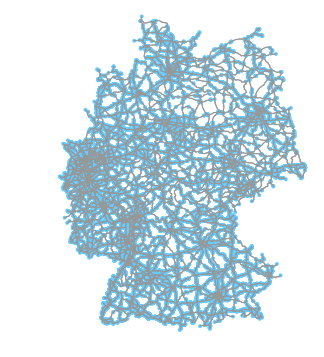

In [9]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, Point


graph1 = ox.load_graphml(filename="allGermany_allstreetsUntilPrim_proj.graphml")

print ("nodes: " + str(len(graph1.nodes(data=True))))
print ("edges: " + str(len(graph1.edges(data=True))))
fig, ax = ox.plot_graph(graph1)

nodes: 71723
edges: 124528


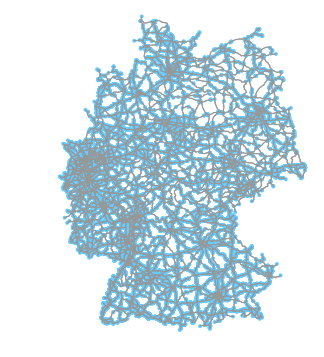

In [11]:
graph = graph1.to_undirected()

print ("nodes: " + str(len(graph1.nodes(data=True))))
print ("edges: " + str(len(graph1.edges(data=True))))
fig, ax = ox.plot_graph(graph1)

In [13]:
ox.save_graphml(graph, filename="allGermany_allstreetsUntilPrim_proj_connected_undirected.graphml")

In [14]:
nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,NaN,NaN,LINESTRING (568327.5286479212 5932559.72230448...,trunk,0,NaN,0,NaN,...,60,Billhorner Brückenstraße,True,5009104,B 4;B 75,NaN,NaN,122329,250945247,NaN
1,NaN,NaN,yes,NaN,LINESTRING (568133.6734376037 5932137.07756460...,trunk,0,NaN,0,NaN,...,60,"[Billhorner Brückenstraße, Billhorner Brücke]",True,"[26949920, 377833912, 5009104]",B 4;B 75,NaN,NaN,122329,248076132,NaN
2,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,60,Billhorner Brückenstraße,True,178064083,NaN,NaN,NaN,122332,32427487,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,1,NaN,...,60,Billhorner Brückenstraße,True,"[264963984, 264963989]",B 75,NaN,NaN,122332,32427487,NaN
4,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,60,Billhorner Brückenstraße,True,26961514,B 75,NaN,NaN,122332,1966813749,NaN


In [33]:
list(edges_1.columns)

['access',
 'area',
 'bridge',
 'est_width',
 'geometry',
 'highway',
 'id',
 'junction',
 'key',
 'landuse',
 'lanes',
 'length',
 'maxspeed',
 'name',
 'oneway',
 'osmid',
 'ref',
 'service',
 'tunnel',
 'u',
 'v',
 'weight',
 'width']

In [31]:
edges_1['length']= (edges_1.geometry.length)

In [32]:
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,name,oneway,osmid,ref,service,tunnel,u,v,weight,width
0,NaN,NaN,NaN,NaN,LINESTRING (568327.5286479212 5932559.72230448...,trunk,0,NaN,0,NaN,...,Billhorner Brückenstraße,True,5009104,B 4;B 75,NaN,NaN,122329,250945247,196.531619,NaN
1,NaN,NaN,yes,NaN,LINESTRING (568133.6734376037 5932137.07756460...,trunk,0,NaN,0,NaN,...,"[Billhorner Brückenstraße, Billhorner Brücke]",True,"[26949920, 377833912, 5009104]",B 4;B 75,NaN,NaN,122329,248076132,1395.331874,NaN
2,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,Billhorner Brückenstraße,True,178064083,NaN,NaN,NaN,122332,32427487,192.557048,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,1,NaN,...,Billhorner Brückenstraße,True,"[264963984, 264963989]",B 75,NaN,NaN,122332,32427487,NaN,NaN
4,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,Billhorner Brückenstraße,True,26961514,B 75,NaN,NaN,122332,1966813749,13.975837,NaN


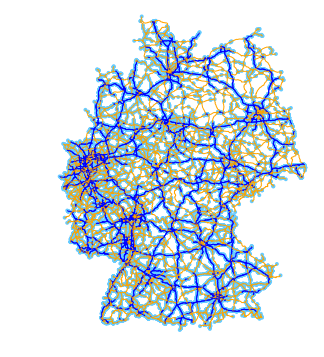

In [15]:
# create empty list for node colors
edge_color = []

# for each node in the graph
for edge in graph.edges(data=True):

    # if the node has the attribute group1 highway
    if 'primary' in edge[2]['highway']:
        edge_color.append('orange')
    elif 'motorway' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'trunk' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'secondary' in edge[2]['highway']:
        edge_color.append('yellow')
    else:
        edge_color.append('grey')  
    
fig, ax = ox.plot_graph(graph,  edge_color=edge_color)

In [34]:
keys = {}

for edge in (graph.edges(data=True)):

    attrs = {}
    if edge[2]['highway']=='motorway':
        attrs['weight']= edge[2]['length']*1
    elif edge[2]['highway']=='primary':
        attrs['weight']= edge[2]['length']*1.5
    elif edge[2]['highway']=='secondary':
        attrs['weight']= edge[2]['length']*1.8
    else:
        attrs['weight']= edge[2]['length']*3

    keyy=(edge[0], edge[1], 0)
    keys[keyy] = attrs

nx.set_edge_attributes(graph, keys)

nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,name,oneway,osmid,ref,service,tunnel,u,v,weight,width
0,NaN,NaN,NaN,NaN,LINESTRING (568327.5286479212 5932559.72230448...,trunk,0,NaN,0,NaN,...,Billhorner Brückenstraße,True,5009104,B 4;B 75,NaN,NaN,122329,250945247,196.531619,NaN
1,NaN,NaN,yes,NaN,LINESTRING (568133.6734376037 5932137.07756460...,trunk,0,NaN,0,NaN,...,"[Billhorner Brückenstraße, Billhorner Brücke]",True,"[26949920, 377833912, 5009104]",B 4;B 75,NaN,NaN,122329,248076132,1395.331874,NaN
2,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,Billhorner Brückenstraße,True,178064083,NaN,NaN,NaN,122332,32427487,192.557048,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,1,NaN,...,Billhorner Brückenstraße,True,"[264963984, 264963989]",B 75,NaN,NaN,122332,32427487,NaN,NaN
4,NaN,NaN,NaN,NaN,LINESTRING (568409.4247386653 5932732.53107916...,primary,NaN,NaN,0,NaN,...,Billhorner Brückenstraße,True,26961514,B 75,NaN,NaN,122332,1966813749,13.975837,NaN


Highway part length: 
motorway: 331 km
trunk:    31 km
primary:  299 km
 
Route length: 664 km


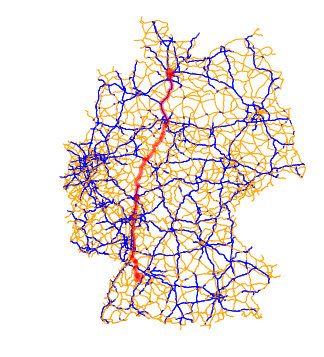

In [45]:
from pandas import *

origin_node = list(graph.nodes())[0]
destination_node = list(graph.nodes())[-10]


route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
     
if len(route)>1: 
    length = 0
    motorway_length = 0
    trunk_length = 0
    primary_length = 0
    #iterate over every single edge along the path
    for i in range(len(route)-1):
        edgeData= graph.get_edge_data(route[i],route[i+1])
        length = length + edgeData[0].get('length')
        if edgeData[0].get('highway') in ('motorway','motorway_link') :
            motorway_length = motorway_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
            trunk_length = trunk_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
            primary_length = primary_length + edgeData[0].get('length') 

#print (length_raw)
print ("Highway part length: ")
print ("motorway: " + str(int(round(motorway_length/1000))) + " km")
print ("trunk:    " + str(int(round(trunk_length/1000))) + " km")
print ("primary:  " + str(int(round(primary_length/1000))) + " km")
print (" ")
print ("Route length: " + str(int(round(length/1000))) + " km")


fig, ax = ox.plot_graph_route(graph, route=route,  edge_color=edge_color, node_color='none')

Highway part length: 
motorway: 636 km
trunk:    1 km
primary:  42 km
 
Route length: 680 km


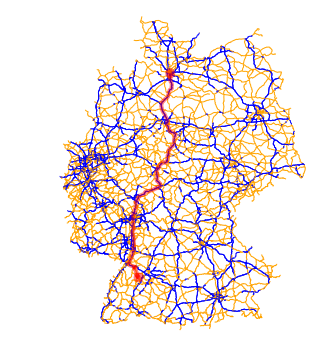

In [44]:
from pandas import *

origin_node = list(graph.nodes())[0]
destination_node = list(graph.nodes())[-10]


route = nx.shortest_path(graph, origin_node, destination_node, weight='weight')
     
if len(route)>1: 
    length = 0
    motorway_length = 0
    trunk_length = 0
    primary_length = 0
    #iterate over every single edge along the path
    for i in range(len(route)-1):
        edgeData= graph.get_edge_data(route[i],route[i+1])
        length = length + edgeData[0].get('length')
        if edgeData[0].get('highway') in ('motorway','motorway_link') :
            motorway_length = motorway_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
            trunk_length = trunk_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
            primary_length = primary_length + edgeData[0].get('length') 

#print (length_raw)
print ("Highway part length: ")
print ("motorway: " + str(int(round(motorway_length/1000))) + " km")
print ("trunk:    " + str(int(round(trunk_length/1000))) + " km")
print ("primary:  " + str(int(round(primary_length/1000))) + " km")
print (" ")
print ("Route length: " + str(int(round(length/1000))) + " km")


fig, ax = ox.plot_graph_route(graph, route=route,  edge_color=edge_color, node_color='none')

In [290]:
#calculate route length by EDGES
# fast access to edge-data

import csv

# origin_node = list(graph1.nodes())[-100]

with open('route_length_germany-prim_real_linkdata.csv','a', newline='') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(['origin_id','destination_id','distance','motorway_distance','trunk_distance','primary_distance'])
    
    #define origin
    for i in range(100):
        
        origin_node = list(graph1.nodes())[i]
        #get the routes
        routes_dij = nx.single_source_dijkstra_path(graph1_proj, origin_node, weight='weight')
        
        #iterate over all the routes that start at origin_node
        for route in list(routes_dij.items()):
            #to make sure it is a route       
            if len(route[1])>1: 
                length = 0
                motorway_length = 0
                trunk_length = 0
                primary_length = 0
                #iterate over every single edge along the path
                for i in range(len(route[1])-1):
                    edgeData= graph1_proj.get_edge_data(route[1][i],route[1][i+1])
                    length = length + edgeData[0].get('length')
                    if edgeData[0].get('highway') in ('motorway','motorway_link') :
                        motorway_length = motorway_length + edgeData[0].get('length')
                    elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
                        trunk_length = trunk_length + edgeData[0].get('length')
                    elif edgeData[0].get('highway') in ('primary', 'primary_link'):
                        primary_length = primary_length + edgeData[0].get('length')  
                newFileWriter.writerow([origin_node, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000))])
#                print ('route_length is '+ str( length)+ ' from ' +str(origin_node)+ ' to ' + str(route[0])+  ' and motorway: ' +str(motorway_length) )
                
                

In [46]:
plz_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/plz_centroide_utm32_nearest_graph-prim_node.csv')


In [56]:
import datetime
import sys
import csv
from shapely.geometry import LineString, Point

start_time= datetime.datetime.now()

#get the OSM nodeID from the motorway junctions
#plz_list = plz_df['nearest_graph-prim_node'][:10].tolist()
plz_list = plz_df['nearest_graph-prim_node'].tolist()

plz_list = list(map(int, plz_list))

print (len(plz_list))
start_list = plz_list
dest_list = plz_list

count=0


# #gets name for nodeid
# def getJuncName(nodeid):
#     name = "'" + str(namedict.get(nodeid)) +"'"
#     return name

#get nearest node, if actual node is not in the graph
def getNearestNode(nodeid):
    coord_x = plz_df.loc[plz_df['nearest_graph-prim_node']==str(nodeid) ]['X'].item()
    coord_y = plz_df.loc[plz_df['nearest_graph-prim_node']==str(nodeid) ]['Y'].item()
    coords = (coord_x, coord_y)
    nearest_node = ox.get_nearest_node(graph, coords, method='euclidean')
    return nearest_node

#progressbar
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))
    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
sys.stdout.flush()


# #create datafrmes to store stuff
# df_raw = pd.DataFrame(columns=['Origin', 'Destination'])
# output_DF = pd.DataFrame(columns=['origin_plz_name', 'origin_plz', 'origin_id','origin_name','destination_id','destination_name','distance'])

with open('route_length_plz2plz_germany-prim_'+ str(len(start_list)) + '.csv','a', newline='') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(['origin_id','destination_id','distance','motorway_distance','trunk_distance','primary_distance'])

    #start to iterate over the nodeslist
    for start in start_list:
        count=count+1
        progress(count, len(start_list), status='')

        #catch if startnode not in network
        try: 
            #print (start)
            #calculate the route from the OSM node to all nodes in the network
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=start,weight='weight')
            
        except:
            print ('')
            print("Start node " + str(start) +" not found")
            nearest_node = getNearestNode(start)
            print("Using nearest node instead, nodeid: " + str(nearest_node))
#             route_lenght = nx.single_source_dijkstra_path_length(G=graph_proj,source=nearest_node, weight='time')
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=nearest_node,weight='weight')
    
        for route in list(routes_dij.items()):
            if route[0] in dest_list:
                #to make sure it is a route       
                if len(route[1])>1: 
                    length = 0
                    motorway_length = 0
                    trunk_length = 0
                    primary_length = 0
                    #iterate over every single edge along the path
                    for i in range(len(route[1])-1):
                        edgeData= graph.get_edge_data(route[1][i],route[1][i+1])
                        length = length + edgeData[0].get('length')
                        if edgeData[0].get('highway') in ('motorway','motorway_link') :
                            motorway_length = motorway_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
                            trunk_length = trunk_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
                            primary_length = primary_length + edgeData[0].get('length')  
                    newFileWriter.writerow([start, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000))])


        #write all origin and destinations in a dataframe
        #df_raw = df_raw.append({'Origin': start,'Destination': mydict}, ignore_index=True)

    #keep track of performance    
    end_time= datetime.datetime.now()
    delta_time = int((end_time-start_time).total_seconds())
    print ('')
    print ('origins: ' + str(len(start_list)))
    print ('time: ' + str(delta_time))
    print ('origins per sec: ' + str(delta_time/len(start_list)))
    print ('rel : '+ str((len(start_list)*(len(start_list)))))
    print ('rel per sec: ' + str(delta_time/(len(start_list)*(len(start_list)))))

    #dump data in csv files
    #df_raw.to_csv('route_length_raw_'+ str(len(start_list)) + 'origins.csv', index=False)
#     output_DF.to_csv('route_length_name_plz2auffahrt'+ str(len(start_list)) + 'origins.csv', index=False)


8207
[============================================================] 100.0% ...
origins: 8207
time: 93317
origins per sec: 11.370415498964299
rel : 67354849
rel per sec: 0.0013854533323948213


In [58]:

plz_route= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-prim_8207.csv')
print (plz_route)

          origin_id  destination_id  distance  motorway_distance  \
0           2071682        25622663         2                  0   
1           2071682      3840043618         3                  0   
2           2071682      3160483032         4                  0   
3           2071682       903673001         5                  0   
4           2071682       534329195         3                  0   
5           2071682       335716505         3                  0   
6           2071682        11005259         5                  0   
7           2071682          534589         6                  0   
8           2071682        31271217         4                  0   
9           2071682      1693649297        16                  0   
10          2071682       248219482         9                  0   
11          2071682        26384674         7                  0   
12          2071682        25272054         8                  2   
13          2071682       778163432         8   